## Depression Analysis

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [5]:
df = pd.read_csv("depression.csv")
df.head(5)

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Depression Indicator
0,Crystal Brooks,64.0,Married,PhD,NaN,Non-smoker,Sedentary,Unemployed,23907,Low,Unhealthy,Fair,No,No,No,No,Yes
1,Roger Webster,77.0,Married,Bachelor's Degree,NaN,Non-smoker,Sedentary,Unemployed,21611,High,Unhealthy,Fair,No,No,No,Yes,Yes
2,Brian Smith,52.0,Married,High School,1.0,Non-smoker,Moderate,Employed,96626,Moderate,Unhealthy,Poor,No,Yes,Yes,No,No
3,Michelle Morrow,29.0,Single,Associate Degree,0.0,Non-smoker,Sedentary,Unemployed,36714,Low,Unhealthy,Poor,No,Yes,No,No,Yes
4,Erin Russell,NaN,Widowed,Master's Degree,3.0,Non-smoker,Sedentary,Unemployed,20825,High,Moderate,Poor,No,No,No,Yes,Yes


In [6]:
df.describe()

,Age,Number of Children,Income
count,523.000000,580.000000,599.000000
mean,48.910134,1.256897,65979.739566
std,17.678091,1.207863,44773.179395
min,18.000000,0.000000,15094.000000
25%,35.000000,0.000000,26085.500000
50%,49.000000,1.000000,38363.000000
75%,65.000000,2.000000,106639.500000
max,80.000000,4.000000,149959.000000


## Removing Irrelevant Columns

### Dropped 'Name' column from the dataset as it is unnecessary for analysis.

In [8]:
df = df.drop(["Name"], axis=1)
df.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Depression Indicator
0,64.0,Married,PhD,NaN,Non-smoker,Sedentary,Unemployed,23907,Low,Unhealthy,Fair,No,No,No,No,Yes
1,77.0,Married,Bachelor's Degree,NaN,Non-smoker,Sedentary,Unemployed,21611,High,Unhealthy,Fair,No,No,No,Yes,Yes
2,52.0,Married,High School,1.0,Non-smoker,Moderate,Employed,96626,Moderate,Unhealthy,Poor,No,Yes,Yes,No,No
3,29.0,Single,Associate Degree,0.0,Non-smoker,Sedentary,Unemployed,36714,Low,Unhealthy,Poor,No,Yes,No,No,Yes
4,NaN,Widowed,Master's Degree,3.0,Non-smoker,Sedentary,Unemployed,20825,High,Moderate,Poor,No,No,No,Yes,Yes


## Checking for any duplicate rows in dataset and removing them if there are any

In [10]:
print("Rows and Column in Dataset are : " , df.shape)

Rows and Column in Dataset are :  (599, 16)


In [11]:
duplicate = df[df.duplicated()]
print("Number of Duplicate rows : ", duplicate.shape)

Number of Duplicate rows :  (0, 16)


## Checking for Null values in Dataset and Removing it

In [13]:
print(df.isnull().sum())

Age                             76
Marital Status                   0
Education Level                  0
Number of Children              19
Smoking Status                   0
Physical Activity Level          0
Employment Status                0
Income                           0
Alcohol Consumption              0
Dietary Habits                   0
Sleep Patterns                   0
History of Mental Illness        0
History of Substance Abuse       0
Family History of Depression     0
Chronic Medical Conditions       0
Depression Indicator             0
dtype: int64


In [14]:
df = df.dropna()

In [15]:
print(df.isnull().sum())

Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
Depression Indicator            0
dtype: int64


## Performing Label Encoding

In [17]:
label_encoder = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column is non-numeric
        df[col] = label_encoder.fit_transform(df[col])

# Display the transformed dataframe
print("Updated Numeric DataFrame:")
print(df.head())

# Verify the data types
print("\nData Types after Encoding:")
print(df.dtypes)

Updated Numeric DataFrame:
    Age  Marital Status  Education Level  Number of Children  Smoking Status  \
2  52.0               1                2                 1.0               2   
3  29.0               2                0                 0.0               2   
5  55.0               1                0                 2.0               2   
6  41.0               0                2                 1.0               2   
7  52.0               3                0                 0.0               1   

   Physical Activity Level  Employment Status  Income  Alcohol Consumption  \
2                        1                  0   96626                    2   
3                        2                  1   36714                    1   
5                        1                  0   71104                    1   
6                        1                  1   25403                    1   
7                        1                  1   38281                    1   

   Dietary Habits  Slee

## Detecting Outliers in Dataset

<Axes: xlabel='Income'>

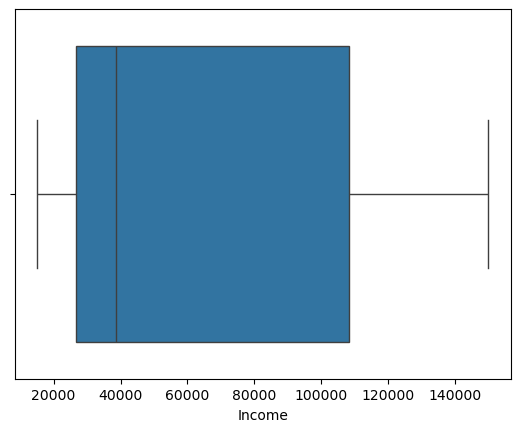

In [19]:
sns.boxplot(x=df['Income'])

### Interpretation: There are no outliers in 'Income' column.

In [21]:
df.shape # Number of rows before removing outliers

(507, 16)

In [22]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [23]:
for col in df.columns:
    if(col=="Age" or col=="Number of Children" or col=="Income"):
        df = remove_outliers(df, col)
        

### All outliers from all the columns has been removed.

In [25]:
df.shape  # Number of rows after removing outliers

(507, 16)

## Plotting the Dataset

### Histogram

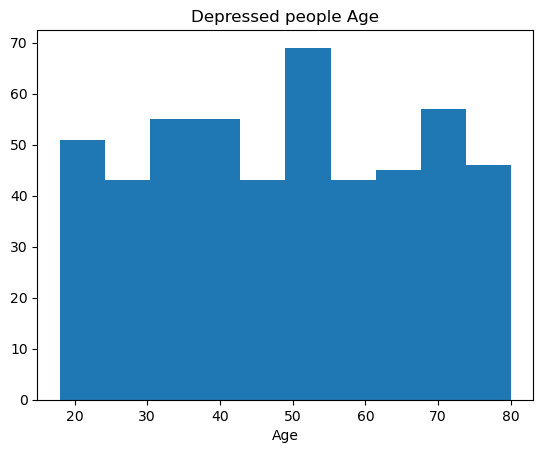

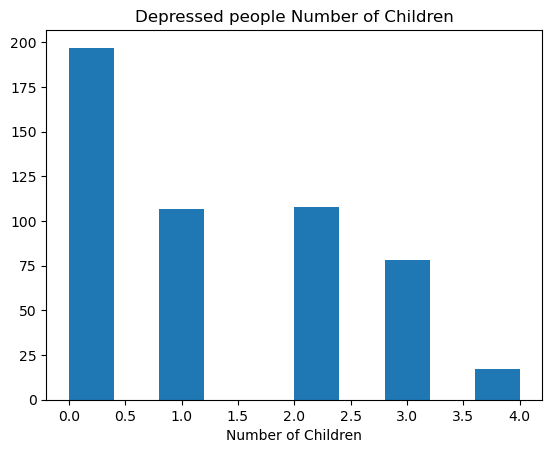

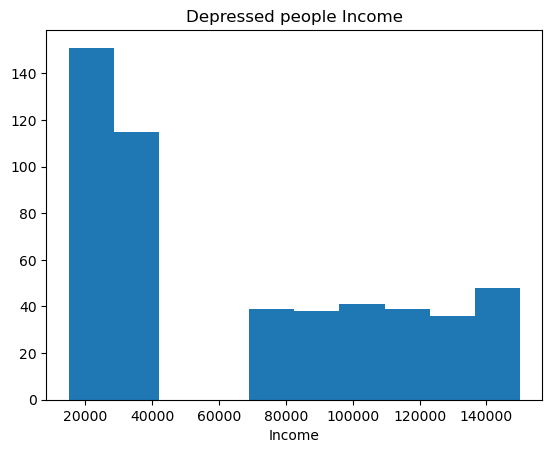

In [28]:
for i in df.columns:
    if df[i].dtype =='float64' or df[i].dtype =='int64':
        col = df[i]
        plt.xlabel(str(i))
        plt.title('Depressed people '+str(i))
        plt.hist(col)
        plt.show()

### Interpretation: The dataset shows that individuals aged 50 to 55 experience the highest prevalence of depression. This age group may require focused attention for mental health interventions.

### Heatmap


Correlation matrix:


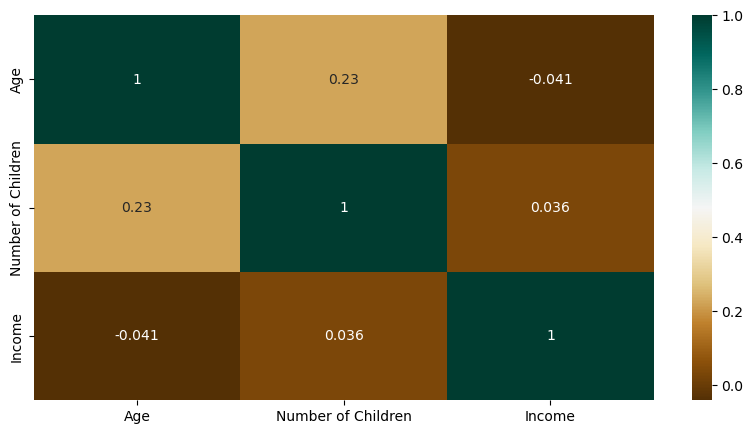

In [31]:
rows = df.iloc[:, :-1]
feature_names = rows.columns

print("\nCorrelation matrix:")
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 5))
c = numeric_df.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
plt.show()

### Interpretation: 

#### A strong negative correlation (-0.92) exists between income and the depression indicator, suggesting that individuals with higher income levels are significantly less likely to experience depression.

#### Employment status also shows a moderate positive correlation (0.47) with income, reinforcing the link between financial stability and mental well-being. Additionally, physical activity level correlates positively with both dietary habits (0.4) and employment status (0.4), indicating that employed individuals tend to engage in healthier lifestyles.

#### Smoking status has a weak positive correlation with age (0.29) and a negative correlation with the number of children (-0.23), implying that older individuals may have higher smoking rates, whereas those with more children are less likely to smoke.


## Performing Dummy Encoding

In [34]:
def dummy_encode(data, column):
    encoded_data = pd.get_dummies(data, columns=[column], drop_first=True)
    print(f"Dummy encoding applied to '{column}'. New columns created:\n{list(encoded_data.columns)}")
    return encoded_data

df_encoded = dummy_encode(df, 'Physical Activity Level')
df_encoded.head()

Dummy encoding applied to 'Physical Activity Level'. New columns created:
['Age', 'Marital Status', 'Education Level', 'Number of Children', 'Smoking Status', 'Employment Status', 'Income', 'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns', 'History of Mental Illness', 'History of Substance Abuse', 'Family History of Depression', 'Chronic Medical Conditions', 'Depression Indicator', 'Physical Activity Level_1', 'Physical Activity Level_2']


,Age,Marital Status,Education Level,Number of Children,Smoking Status,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Depression Indicator,Physical Activity Level_1,Physical Activity Level_2
2,52.0,1,2,1.0,2,0,96626,2,2,2,0,1,1,0,0,True,False
3,29.0,2,0,0.0,2,1,36714,1,2,2,0,1,0,0,1,False,True
5,55.0,1,0,2.0,2,0,71104,1,2,2,0,0,0,0,0,True,False
6,41.0,0,2,1.0,2,1,25403,1,2,1,0,0,1,1,1,True,False
7,52.0,3,0,0.0,1,1,38281,1,2,0,1,1,0,0,1,True,False


## Distribution of nominal variables using count plot

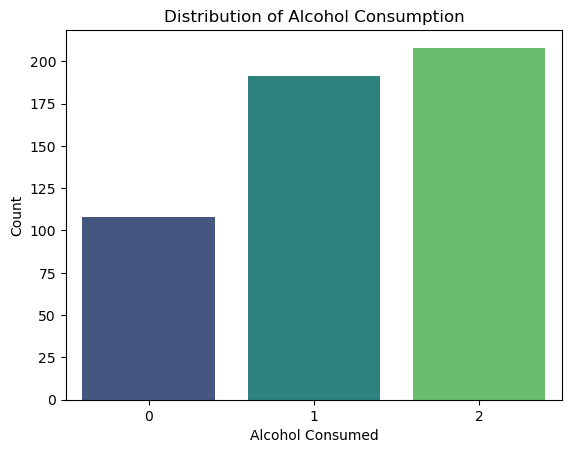

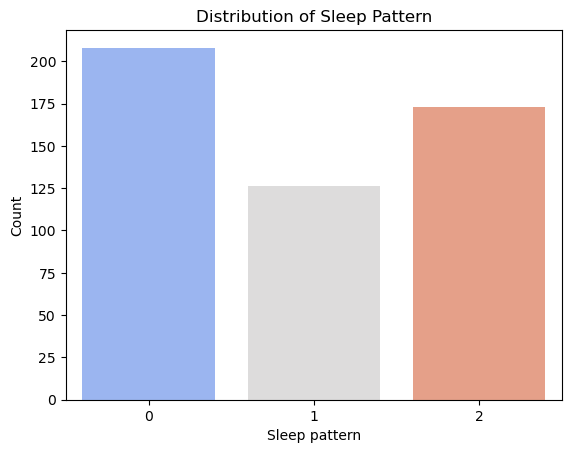

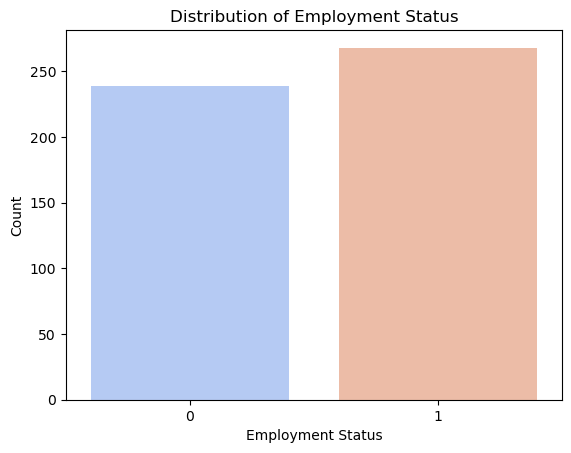

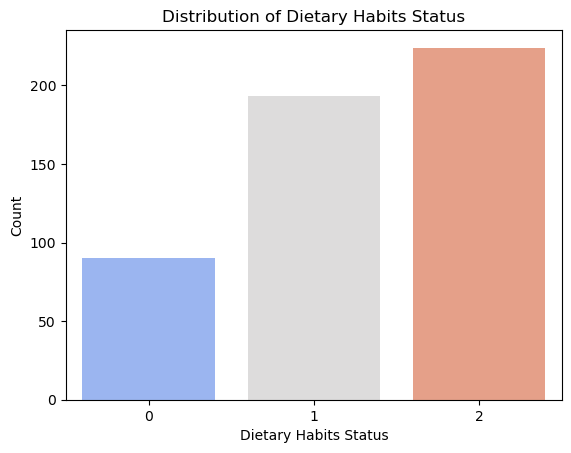

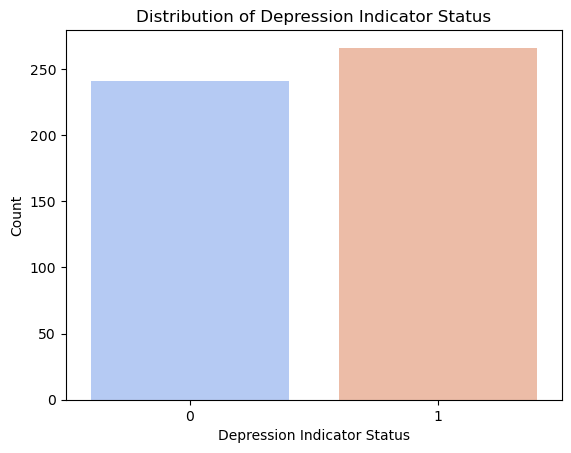

In [36]:
import warnings
warnings.filterwarnings('ignore')

sns.countplot(data=df, x='Alcohol Consumption', palette='viridis')
plt.title('Distribution of Alcohol Consumption')
plt.xlabel('Alcohol Consumed')
plt.ylabel('Count')
plt.show()
print()

sns.countplot(data=df, x='Sleep Patterns', palette='coolwarm')
plt.title('Distribution of Sleep Pattern')
plt.xlabel('Sleep pattern')
plt.ylabel('Count')
plt.show()

sns.countplot(data=df, x='Employment Status', palette='coolwarm')
plt.title('Distribution of Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.show()

sns.countplot(data=df, x='Dietary Habits', palette='coolwarm')
plt.title('Distribution of Dietary Habits Status')
plt.xlabel('Dietary Habits Status')
plt.ylabel('Count')
plt.show()

sns.countplot(data=df, x='Depression Indicator', palette='coolwarm')
plt.title('Distribution of Depression Indicator Status')
plt.xlabel('Depression Indicator Status')
plt.ylabel('Count')
plt.show()

### Scatter Plot

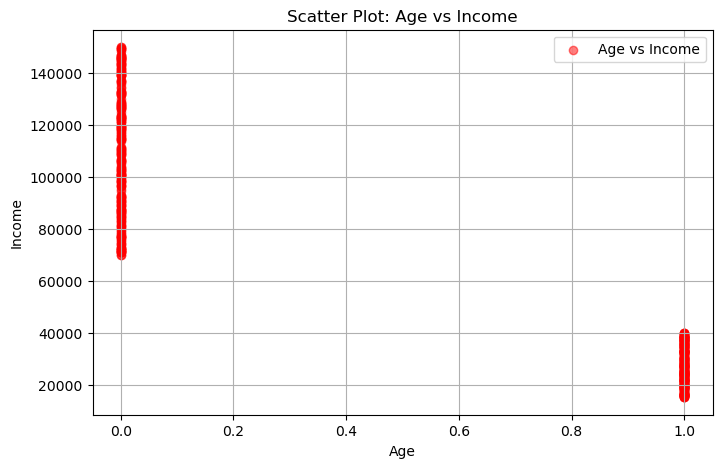

In [38]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Depression Indicator'], df['Income'], color='red', alpha=0.5, label='Age vs Income')
plt.title('Scatter Plot: Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.grid(True)
plt.legend()
plt.show()

### Interpretation: A strong negative correlation exists between income and the depression indicator, suggesting that individuals with higher income levels are significantly less likely to experience depression.¶

### Voilin Plot

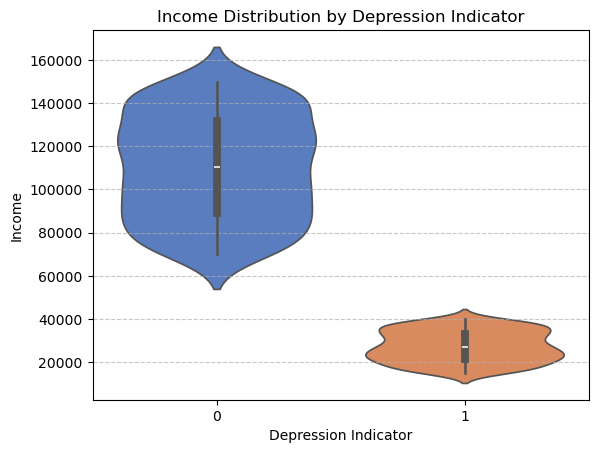

In [41]:
violin_data = df[['Income', 'Depression Indicator']].dropna()

sns.violinplot(x='Depression Indicator', y='Income', data=violin_data, palette='muted')

plt.title('Income Distribution by Depression Indicator')
plt.xlabel('Depression Indicator')
plt.ylabel('Income')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Interpretation : This violin plot shows income distribution differs between people with and without depression. Those without depression have a wider range of income, with higher median income. Those with depression have a narrower income range, suggesting potential financial challenges.

### Swarm Plot

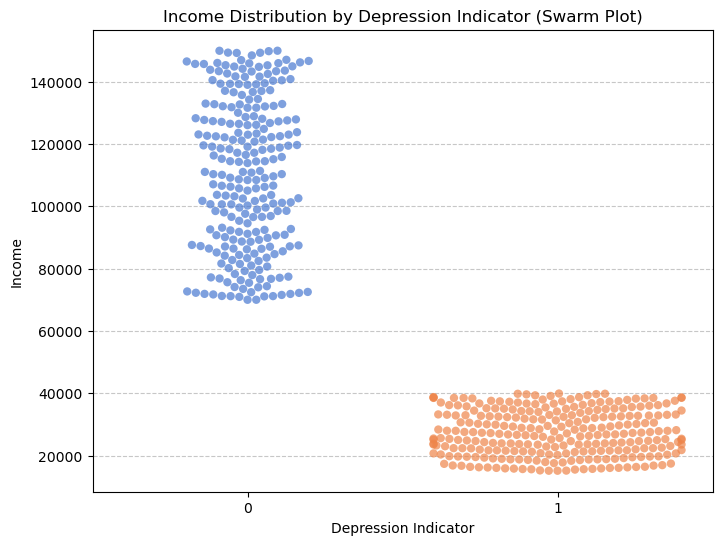

In [44]:
plt.figure(figsize=(8, 6))
sns.swarmplot(x='Depression Indicator', y='Income', data=violin_data, palette='muted', size=6, alpha=0.7)

plt.title('Income Distribution by Depression Indicator (Swarm Plot)')
plt.xlabel('Depression Indicator')
plt.ylabel('Income')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Interpretation : This swarm plot shows a clear income difference between people with and without depression. Those without depression have a wider range of income, often higher, while those with depression have a narrower range, often lower.

## Determing Dependent and Independent Variables

In [47]:
X = df[['Income']]
y = df['Depression Indicator']

## Spliting the Dataset into Train and Test set

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(len(X_train),len(y_train))

405 405


## Feature Scaling

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Fiting the Model to Training Set

In [53]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

### Interpretation: Made a instance of LinearRegression mode and fit the data to it.

## Retrieving Intercept and Slope

In [56]:
intercept = reg.intercept_
print("Intercept:", intercept)

coefficients = reg.coef_
print("Coefficients:", coefficients)

Intercept: 0.5308641975308641
Coefficients: [-0.46086634]


## Predicting the Results

In [58]:
y_pred = reg.predict(X_test)

## Calculating The Accuracy

In [60]:
from sklearn.metrics import mean_squared_error, r2_score

print("Model Score in Training data : ",reg.score(X_train, y_train))
print("Model Score in Testing data : ",reg.score(X_test, y_test))

# Retrieve the intercept and slope
intercept = reg.intercept_
slope = reg.coef_

print(f"Intercept: {intercept}")
print(f"Slope: {slope}")


# Print predicted and actual values
print("\nPredicted vs Actual values:")
for predicted, actual in zip(y_pred, y_test):
    print(f"Predicted: {predicted}, Actual: {actual}")

Model Score in Training data :  0.8528408085500475
Model Score in Testing data :  0.8418359804117924
Intercept: 0.5308641975308641
Slope: [-0.46086634]

Predicted vs Actual values:
Predicted: 1.0120568748996916, Actual: 1
Predicted: 0.4740800845515997, Actual: 0
Predicted: 0.8760029214329708, Actual: 1
Predicted: 0.9918881503562709, Actual: 1
Predicted: 1.022547906196142, Actual: 1
Predicted: 0.9720694700366768, Actual: 1
Predicted: 1.0112847185236036, Actual: 1
Predicted: 0.8177514444208855, Actual: 1
Predicted: 0.9130561320668511, Actual: 1
Predicted: 0.960312102283442, Actual: 1
Predicted: 1.0048706728928987, Actual: 1
Predicted: 0.34086766654888295, Actual: 0
Predicted: -0.2773825006573266, Actual: 0
Predicted: -0.052180519716649054, Actual: 0
Predicted: 1.0254718050069287, Actual: 1
Predicted: 0.836190538681869, Actual: 1
Predicted: 0.9839503828100854, Actual: 1
Predicted: 0.48136924074187126, Actual: 0
Predicted: 0.39491861287504904, Actual: 0
Predicted: -0.1473101852507014, Actu

## Plotting the Graph

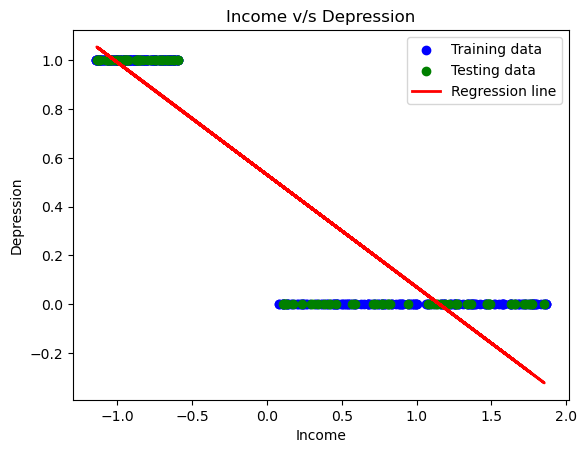

In [62]:
# Plot the training data
plt.scatter(X_train, y_train, color='blue', label='Training data')

# Plot the testing data
plt.scatter(X_test, y_test, color='green', label='Testing data')

# Plot the regression line
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')

plt.xlabel('Income')
plt.ylabel('Depression')
plt.title('Income v/s Depression')
plt.legend()
plt.show()

### Interpretation: Training data represented by blue dots and Testing data by green dots. <br><br> The red regression line shows a strong negative correlation, indicating that as income increases, the likelihood of experiencing depression decreases. <br><br>The data points are clustered at two distinct levels on the y-axis (0 and 1), suggesting that depression is treated as a binary variable (0 = No Depression, 1 = Depression). <br><br>The regression line effectively captures the downward trend, supporting the earlier correlation analysis, which found a strong negative correlation (-0.92) between income and depression. This suggests that financial stability may play a crucial role in reducing depression risk.

## Evaluation

In [65]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

Mean Squared Error: 0.03954100489705189
R-squared Score: 0.8418359804117924


### Interpretation : <br><br>The Mean Squared Error (MSE) of 0.0395 indicates that the model's predictions are quite close to the actual values, as lower MSE values represent better predictive performance. This suggests that the regression model has minimal deviation from the true data points. <br><br> The R-squared (R²) score of 0.8418 signifies that approximately 84.18% of the variance in depression can be explained by income. This is a strong R² value, indicating that income is a significant predictor of depression levels. <br><br><br>Overall, the model performs well, showing that income has a strong inverse relationship with depression, but additional variables may further refine the prediction accuracy.